In [1]:
import pickle

# Define the path to the .pkl file
input_path = "/data/sr933/scRCC/combined_data/RCC_data_dict.pkl"

# Load the dictionary from the .pkl file
with open(input_path, "rb") as f:
    data_dict = pickle.load(f)

# Access the contents of the dictionary
X_combined = data_dict["X"].T
y_labels = data_dict["y"]
gene_list = data_dict["Genes"]

In [4]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_combined and y_labels are already loaded
# Check the shape of the data
print("Shape of X_combined:", X_combined.shape)
print("Shape of y_labels:", len(y_labels))

# Step 1: Initialize and fit UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Step 2: Transform the data
X_umap = reducer.fit_transform(X_combined)


Shape of X_combined: (272863, 12206)
Shape of y_labels: 272863


KeyboardInterrupt: 

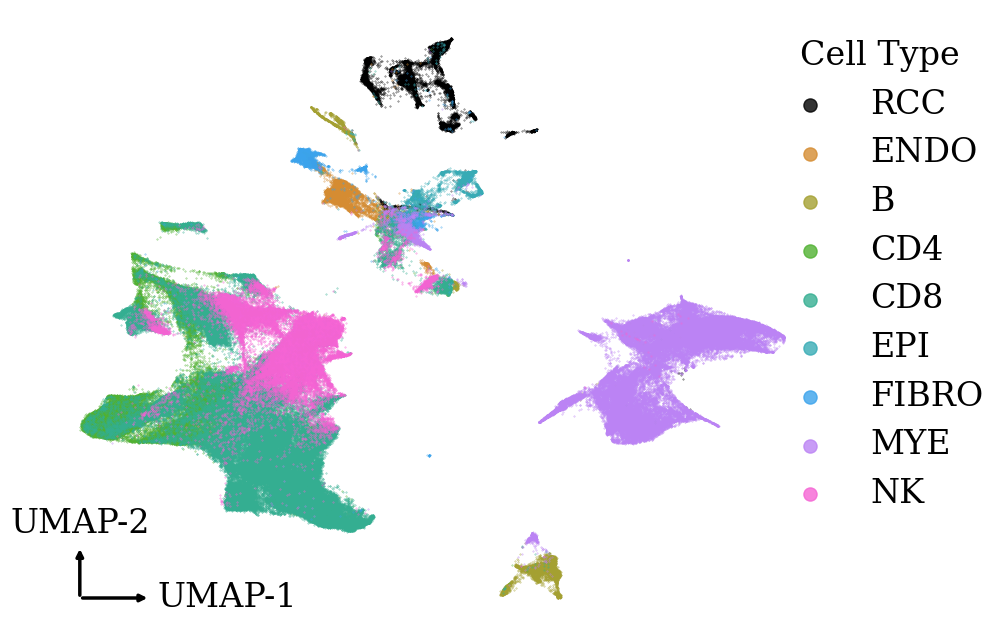

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Update plot parameters for a clean aesthetic
params = {
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": "Helvetica",
}
plt.rcParams.update(params)

# Define target names and colors
targets = ["RCC", "ENDO", "B", "CD4", "CD8", "EPI", "FIBRO", "MYE", "NK"]
num_targets = len(targets)
colors = sns.color_palette("husl", num_targets)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Map numerical labels to target names
mapped_labels = [targets[label] for label in y_labels]

# Plot each class
for i, target in enumerate(targets):
    cell_colour = colors[i] if target != "RCC" else "k"
    mask = np.array(mapped_labels) == target
    ax.scatter(
        X_umap[mask, 0],
        X_umap[mask, 1],
        c=[cell_colour],
        label=target,
        s=0.1,
        alpha=0.8
    )

# Add legend
legend = ax.legend(
    title="Cell Type",
    fontsize=24,
    markerscale=30,
    loc="upper right",
    frameon=False,
    title_fontsize=24,
    bbox_to_anchor=(1.25, 1.0)
)

# Remove axes
ax.axis("off")

# Calculate bottom-left corner for arrows
min_x, min_y = X_umap[:, 0].min(), X_umap[:, 1].min()
range_x = X_umap[:, 0].max() - min_x
range_y = X_umap[:, 1].max() - min_y

arrow_len_x = 0.1 * range_x
arrow_len_y = 0.1 * range_x

# Draw arrows from bottom-left corner
ax.annotate("", xy=(min_x + arrow_len_x, min_y), xytext=(min_x, min_y),
            arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=2.5))
ax.annotate("", xy=(min_x, min_y + arrow_len_y), xytext=(min_x, min_y),
            arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=2.5))

# Add axis labels near the arrow tips
ax.text(min_x + arrow_len_x + 0.01 * range_x, min_y, "UMAP-1", fontsize=24, ha="left", va="center")
ax.text(min_x, min_y + arrow_len_y + 0.01 * range_y, "UMAP-2", fontsize=24, ha="center", va="bottom")

# Save and show
save_path = "/home/sr933/output/umap_train_all_nature_arrows.png"
plt.savefig(save_path, bbox_inches="tight", dpi=900)
plt.show()
